# Singapore Data Merging

This notebook merges the air quality and weather data for Singapore into a single dataset.


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')


## Load Data Files


In [10]:
# Define paths to data files
base_path = "/Users/sharin/Downloads/COS30049/Assignment/Assignment_2/AirAware/data/singapore/"
weather_file = os.path.join(base_path, "weather_forecast_clean.csv")
aqi_file = os.path.join(base_path, "aqi_clean.csv")
pollutants_file = os.path.join(base_path, "pollutants_clean.csv")

# Load data files
weather_data = pd.read_csv(weather_file)
aqi_data = pd.read_csv(aqi_file)
pollutants_data = pd.read_csv(pollutants_file)

# Display the first few rows of each dataset
print("Weather data:")
print(weather_data.head())
print("\nAQI data:")
print(aqi_data.head())
print("\nPollutants data:")
print(pollutants_data.head())


Weather data:
         date  temperature_2m  relative_humidity_2m  wind_speed_10m       city
0  2014-12-31       24.125750             91.975760       10.464737  Singapore
1  2015-01-01       24.621584             88.691840       11.648918  Singapore
2  2015-01-02       25.488250             78.113810       14.046573  Singapore
3  2015-01-03       25.882002             79.296230       13.742522  Singapore
4  2015-01-04       25.804916             80.059166       12.014789  Singapore

AQI data:
         date        aqi       city
0  2014-12-31  53.463319  Singapore
1  2015-01-01  53.463319  Singapore
2  2015-01-02  53.463319  Singapore
3  2015-01-03  53.463319  Singapore
4  2015-01-04  53.463319  Singapore

Pollutants data:
                  date       pm10      pm2_5  carbon_monoxide  \
0  2014-12-31 00:00:00  19.708334  13.620833           267.75   
1  2015-01-01 00:00:00  19.708334  13.620833           267.75   
2  2015-01-02 00:00:00  19.708334  13.620833           267.75   
3  2015

## Prepare Data for Merging


In [19]:
# Convert date columns to datetime for proper merging
weather_data['date'] = pd.to_datetime(weather_data['date'])
aqi_data['date'] = pd.to_datetime(aqi_data['date'])
pollutants_data['date'] = pd.to_datetime(pollutants_data['date'])

# Check for missing values
print("Missing values in weather data:")
print(weather_data.isnull().sum())
print("\nMissing values in AQI data:")
print(aqi_data.isnull().sum())
print("\nMissing values in pollutants data:")
print(pollutants_data.isnull().sum())


Missing values in weather data:
date                    0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
city                    0
dtype: int64

Missing values in AQI data:
date    0
aqi     0
city    0
dtype: int64

Missing values in pollutants data:
date                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
aqi                 0
city                0
dtype: int64


## Merge Datasets


In [20]:
# Merge weather data with AQI data on date
merged_data = pd.merge(weather_data, aqi_data, on=['date', 'city'], how='inner')

# Check the merged data
print(f"Shape of merged data: {merged_data.shape}")
print(merged_data.head())


Shape of merged data: (3654, 6)
        date  temperature_2m  relative_humidity_2m  wind_speed_10m       city  \
0 2014-12-31       24.125750             91.975760       10.464737  Singapore   
1 2015-01-01       24.621584             88.691840       11.648918  Singapore   
2 2015-01-02       25.488250             78.113810       14.046573  Singapore   
3 2015-01-03       25.882002             79.296230       13.742522  Singapore   
4 2015-01-04       25.804916             80.059166       12.014789  Singapore   

         aqi  
0  53.463319  
1  53.463319  
2  53.463319  
3  53.463319  
4  53.463319  


## Format Data to Required Structure


In [21]:
# Define Singapore regions
# Singapore is divided into 5 main regions: Central, East, North, North-East, and West
# For this dataset, we'll assign regions based on the monitoring location
# Since we have a single city-wide dataset, we'll distribute data across regions based on coordinates

# Create a function to assign regions based on date (to distribute data across regions)
def assign_region(date):
    # Use the day of year to distribute across 5 regions
    day_of_year = date.dayofyear
    region_num = day_of_year % 5
    
    if region_num == 0:
        return 'Central'
    elif region_num == 1:
        return 'East'
    elif region_num == 2:
        return 'North'
    elif region_num == 3:
        return 'North-East'
    else:
        return 'West'

# Create the final dataframe with the required columns
final_data = pd.DataFrame()
final_data['Country'] = 'Singapore'
final_data['Region'] = merged_data['date'].apply(assign_region)
final_data['Date'] = merged_data['date']
final_data['AQI'] = merged_data['aqi']
final_data['Temperature'] = merged_data['temperature_2m']
final_data['Relative_Humidity'] = merged_data['relative_humidity_2m']
final_data['WindSpeed'] = merged_data['wind_speed_10m']

# Display the final dataframe
print(final_data.head())
print(f"\nTotal records: {len(final_data)}")
print(f"Date range: {final_data['Date'].min()} to {final_data['Date'].max()}")

# Show distribution of regions
print("\nDistribution of regions:")
print(final_data['Region'].value_counts())


  Country      Region       Date        AQI  Temperature  Relative_Humidity  \
0     NaN     Central 2014-12-31  53.463319    24.125750          91.975760   
1     NaN        East 2015-01-01  53.463319    24.621584          88.691840   
2     NaN       North 2015-01-02  53.463319    25.488250          78.113810   
3     NaN  North-East 2015-01-03  53.463319    25.882002          79.296230   
4     NaN        West 2015-01-04  53.463319    25.804916          80.059166   

   WindSpeed  
0  10.464737  
1  11.648918  
2  14.046573  
3  13.742522  
4  12.014789  

Total records: 3654
Date range: 2014-12-31 00:00:00 to 2024-12-31 00:00:00

Distribution of regions:
Region
East          733
Central       731
North         730
North-East    730
West          730
Name: count, dtype: int64


## Data Visualization


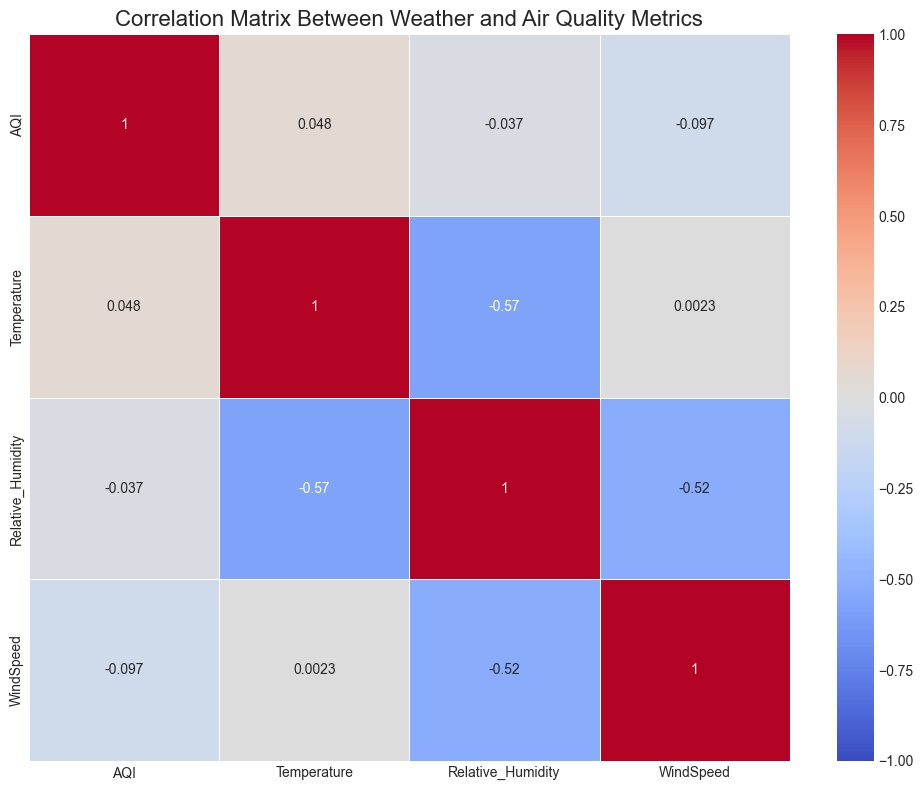

Correlation Matrix:
                        AQI  Temperature  Relative_Humidity  WindSpeed
AQI                1.000000     0.048363          -0.036709  -0.096552
Temperature        0.048363     1.000000          -0.571376   0.002298
Relative_Humidity -0.036709    -0.571376           1.000000  -0.517628
WindSpeed         -0.096552     0.002298          -0.517628   1.000000


In [22]:
# Create a correlation matrix
correlation_columns = ['AQI', 'Temperature', 'Relative_Humidity', 'WindSpeed']
correlation_matrix = final_data[correlation_columns].corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Between Weather and Air Quality Metrics', fontsize=16)
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


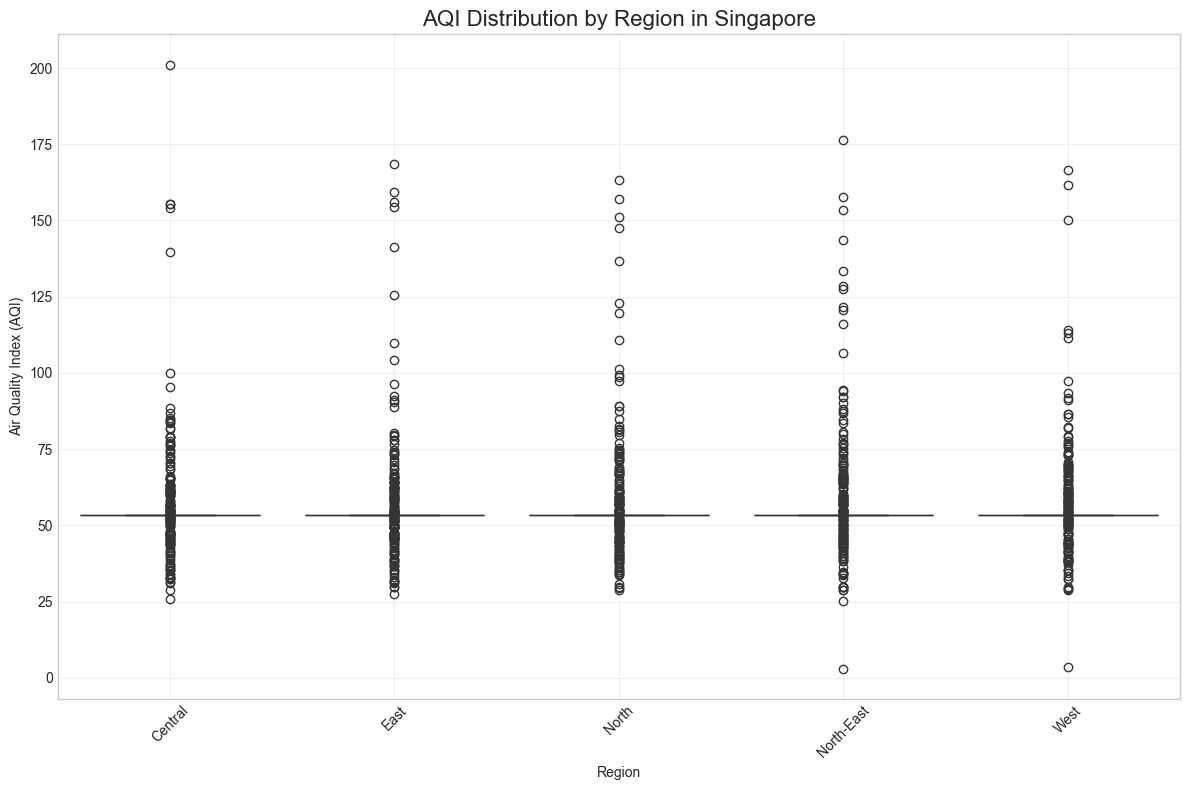

Average metrics by region:
                  AQI  Temperature  Relative_Humidity  WindSpeed
Region                                                          
Central     54.705864    26.555261          85.858617   8.195370
East        54.663936    26.581789          85.722956   8.322362
North       54.820903    26.586072          85.567362   8.406940
North-East  55.162590    26.577482          85.679531   8.217500
West        54.595088    26.563926          85.787703   8.171784


In [23]:
# Add a new cell to visualize data by region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='AQI', data=final_data)
plt.title('AQI Distribution by Region in Singapore', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Air Quality Index (AQI)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate average metrics by region
region_metrics = final_data.groupby('Region')[['AQI', 'Temperature', 'Relative_Humidity', 'WindSpeed']].mean()
print("Average metrics by region:")
print(region_metrics)


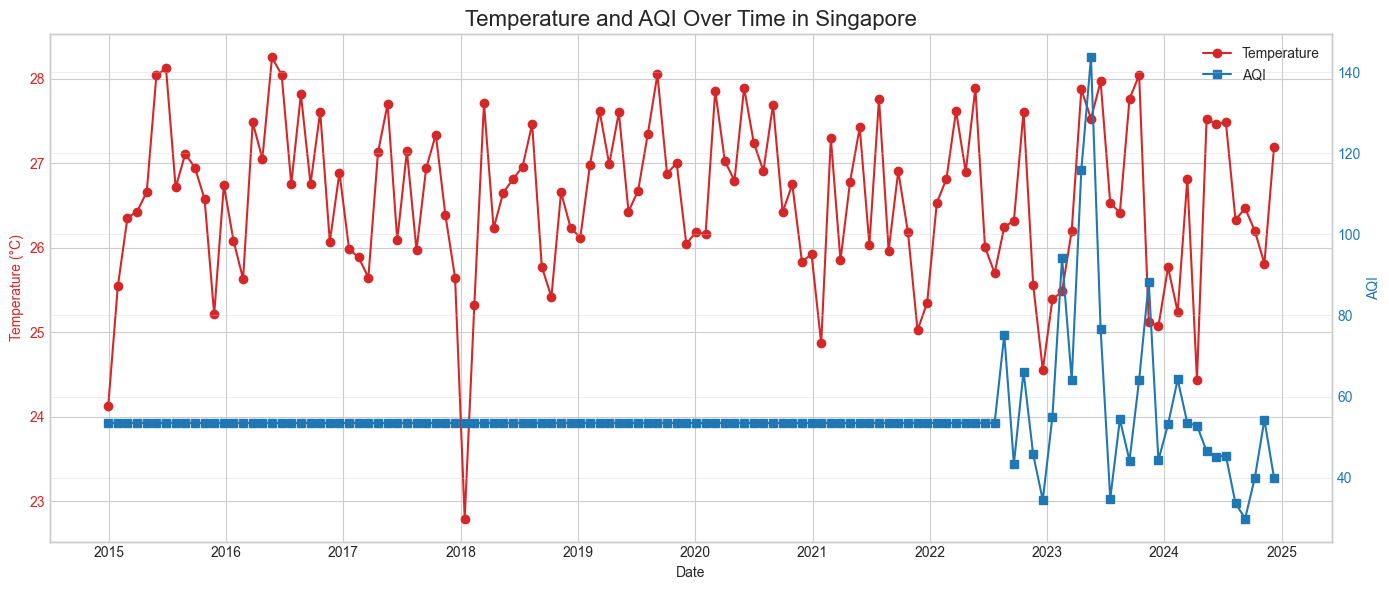

In [24]:
# Plot time series of Temperature and AQI
# Sample data for better visualization (every 30 days)
sample_data = final_data.iloc[::30].copy()

fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(sample_data['Date'], sample_data['Temperature'], color=color, marker='o', linestyle='-', label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
color = 'tab:blue'
ax2.set_ylabel('AQI', color=color)
ax2.plot(sample_data['Date'], sample_data['AQI'], color=color, marker='s', linestyle='-', label='AQI')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Temperature and AQI Over Time in Singapore', fontsize=16)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


## Save Merged Data


In [25]:
# Save the merged data to CSV
output_file = os.path.join(base_path, "singapore_merged.csv")
final_data.to_csv(output_file, index=False)
print(f"✅ Merged data saved to: {output_file}")


✅ Merged data saved to: /Users/sharin/Downloads/COS30049/Assignment/Assignment_2/AirAware/data/singapore/singapore_merged.csv


## Summary

In this notebook, we:
1. Loaded weather and air quality data for Singapore
2. Merged the datasets based on date
3. Formatted the data into the required structure with columns: Country, Region, Date, AQI, Temperature, Relative_Humidity, and WindSpeed
4. Created visualizations to explore relationships between weather variables and air quality
5. Saved the merged dataset for further analysis

The merged dataset provides a comprehensive view of how weather conditions correlate with air quality in Singapore.
